# Final homework

*Akademia Leona Kozminskiego*

#### Descriptive Statistics

*Prof.* Katarzyna Piotrowska 
<br>
*Student:* Alejandro Guzmán Rivera (*23-DS*)

**Instructions** <br>

A simple quantitative, explanatory research (for 5: with the theory-based justification of the hypothesis i.e. literature review with references etc.). At least one variable on the qualitative level of measurement (categorical or ordinal) and one on the quantitative (interval or ratio) level of measurement.<br>

1. Research question and hypothesis (if applicable) – is the research descriptive or explanatory?
2. Variables’ definitions (conceptualisation)
3. Operationalisation (variables’ indicators, their levels and levels of measurement)
4. Subject of the study: observation unit
5. Data collection procedure
6. Data analysis <br>
  6.1. Sample description <br>
  6.2. Bivariate and/or multivariate analyses (at least two different) with the justification of the choice of
    the method and interpretation of the results <br>
  6.3. The purpose of use descriptive statistics (sample description, the answer to research question, other) <br>
10. Conclusions/discussion

## 1. Research question

* What is the impact of crops production in Poland in Greenhouse Gasses (GHG), specifically Nitrous Oxide through the period 1961-2019? 

## 2. Hypothesis

* There is a positive correlation between Cereals, Roots and Tubers and Potatoes production and Nitrous Oxide (N2O) emissions in Poland during the period 1971 to 2018.

## 3. Variables definition

In [4]:
variables_defi = {"y": ["N2O emissions"], 
                  "x1": ["Cereals production"] ,
                  "x2": ["Roots and Tubers production"],
                  "x3": ["Potatoes production"]}
print(tabulate(variables_defi, headers="keys", tablefmt="fancy_grid", stralign="center"))

╒═══════════════╤════════════════════╤═════════════════════════════╤═════════════════════╕
│       y       │         x1         │             x2              │         x3          │
╞═══════════════╪════════════════════╪═════════════════════════════╪═════════════════════╡
│ N2O emissions │ Cereals production │ Roots and Tubers production │ Potatoes production │
╘═══════════════╧════════════════════╧═════════════════════════════╧═════════════════════╛


## 4. Subject of study

Nitrous Oxide (N2O) emissions according to crops production.

## 5. Data collection procedure

### 5.1 Crop production data collection procedure

#### 5.1.1 Importing libraries

In [5]:
# Tables creation
from tabulate import tabulate

# Tables manipulation and numbers formatting
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Statistical analysis
from matplotlib import pyplot as plt
from matplotlib import figure
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf  

# Graphics creation and aesthetics
import seaborn as sns
sns.set()


#### 5.1.2 Characteristics and description of the crops dataset

According to Wąs *et al.* (2020), the level of GHG emissions depends on the type of agricultural land utilisation (type of crops) and the level of production intensity and applied techniques. About Poland case Agriculture is the largest emitter of N2O in the country, producing 78.0% of this GHG. Nearly 85.8% of N2O emissions in agriculture come from the section of agricultural soils.

The crops production dataset was obtained from originally from *data.world*. That dataset was taken in first place from the Food and Agriculture Organization of the United Nations (FAO) which contains statistics of 173 farm products around the world. The original dataset was filtered using SQL by area code, in this case "173" that corresponds to Poland. <br>

The first descriptive analysis presented that, the most important crops in terms of production were: Cereals (in general), Potatoes and Roots and Tubers. However, the crop production dataset showed that, at least for this case, columns names of "Potatoes" and "Roots and Tubers" have exactly the same values. This odd situation requires further research but in order to continue the analysis and due to the amount of the production of both (highly superior compared to other crops), "Roots and Tubers" variable was discarded for the analysis.

The Nitrous Oxide (N2O) emissions dataset was obtained from The World Bank (2022) website . This dataset contains information from 1971 to 2018. To make the dataset symetric, this period was chosen also for crops dataset. 

After a first analysis of the crops dataset, the three most prolific crops products produced in Poland between 1971 and 2018 are:

1. Cereals:                                 1,583,068,952.00
2. Potatoes:                                1,334,122,051.00

Moren information about these production can be found in the cells below.


In [6]:
# Import the data set from local

data_crops = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1961-crop-production-in-Poland-QueryResult.csv")

#### 5.1.3 Characteristics of the variables in the dataset.

In [7]:
# Description of the raw data.

data_crops_charact = ([["Variable", "Description"],
                        ['area_code', "173"], 
                        ['area', "Poland"], 
                        ['item_code', "Product code"], 
                        ['item', "Product name"], 
                        ['element_code',"Code of the element"], 
                        ['element',"Type of production: Production, area harvested, yield"], 
                        ['unit',"Unit of measurement: tonnes, Ha, Hg/Ha"], 
                        ['year',"Years (1971-2018)"]])

In [8]:
print(tabulate(data_crops_charact, headers= "firstrow", tablefmt='fancy_grid'))

╒══════════════╤═══════════════════════════════════════════════════════╕
│ Variable     │ Description                                           │
╞══════════════╪═══════════════════════════════════════════════════════╡
│ area_code    │ 173                                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ area         │ Poland                                                │
├──────────────┼───────────────────────────────────────────────────────┤
│ item_code    │ Product code                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ item         │ Product name                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ element_code │ Code of the element                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ element      │ Type of production: Production, ar

In [9]:
# Description of the dataset according to leveles of measurement.

vars_crops_charact =    ([["Variable", "Type", "Level"],
                        ['area_code', "Integer", "Nominal"], 
                        ['area', "String", "Nominal"], 
                        ['item_code', "Integer", "Nominal"], 
                        ['item', "String", "Nominal"], 
                        ['element_code',"Integer", "Nominal"], 
                        ['element',"String", "Nominal"], 
                        ['unit',"String", "Nominal"], 
                        ['year',"String/Float", "Ratio"]])

In [10]:
print(tabulate(vars_crops_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤══════════════╤═════════╕
│ Variable     │ Type         │ Level   │
╞══════════════╪══════════════╪═════════╡
│ area_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ area         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element_code │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element      │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ unit         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ year         │ String/Float │ Ratio   │
╘══════════════╧══════════════╧═════════╛


### 5.2 Crop production dataset cleaning

##### 5.2.1 Checking for NAN values

In [11]:
# Getting a sample of the NAN values
data_crops.isna().sum()
data_crops.isna().T.head().T

,area_code,area,item_code,item,element_code
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
276,False,False,False,False,False
277,False,False,False,False,False
278,False,False,False,False,False
279,False,False,False,False,False


##### 5.2.2 Replace NAN with 0 and grouping the dataset

In [12]:
# Replacing NAN with 0
data_crops.replace(np.nan, 0)

# Describing the data_crops dataset
dataCropsGrouped = data_crops.groupby(["item"]).sum()

#Grouping the data_crops dataset by item
dataCropsGrouped = dataCropsGrouped.drop(columns=["area_code", "item_code", "element_code"])

In [13]:
# dataCropsGrouped set information
dataCropsGrouped
dataCropsGrouped.head()
dataCropsGrouped.T.head().T

,y1971,y1972,y1973,y1974,y1975
item,,,,,
"Almonds, with shell",0.00,0.00,0.00,0.00,0.00
"Anise, badian, fennel, coriander","3,400.00",0.00,0.00,0.00,0.00
Apples,"563,200.00","558,500.00","682,500.00","594,300.00","840,722.00"
Apricots,0.00,0.00,0.00,0.00,0.00
Artichokes,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...
"Vegetables, leguminous nes",0.00,0.00,0.00,0.00,0.00
Vetches,"76,706.00","62,621.00","62,000.00","70,000.00","52,600.00"
"Walnuts, with shell",0.00,0.00,0.00,0.00,0.00


##### 5.2.3 Check for the most important crops from **dataCropsGrouped** dataset

In [14]:
dataCropsGroupedSum = dataCropsGrouped.sum(axis=1)

In [15]:
dataCropsGroupedSum.sort_values(ascending=False).head()

item
Cereals, Total            1,583,068,952.00
Roots and Tubers, Total   1,334,122,051.00
Potatoes                  1,334,122,051.00
Sugar Crops Primary         682,033,347.00
Sugar beet                  682,033,347.00
dtype: float64

In [16]:
cleanDataCrops = dataCropsGroupedSum.loc[~(dataCropsGroupedSum == 0)]

##### 5.2.4 Calculate mean and median

In [17]:
print(f"The mean is: {dataCropsGroupedSum.mean()}")
print(f"The median is: {dataCropsGroupedSum.median()}")

The mean is: 83768657.25490196
The median is: 2892161.0


##### 5.2.5 Getting all the rows above the median value (3,513,392.5)

In [18]:
# Filtering data by the median value
ImportantDataCrops = cleanDataCrops[cleanDataCrops > 3513392.5]

# Ordering data by descending and getting the first values
ImportantDataCrops.sort_values(ascending=False).head()

item
Cereals, Total            1,583,068,952.00
Potatoes                  1,334,122,051.00
Roots and Tubers, Total   1,334,122,051.00
Sugar beet                  682,033,347.00
Sugar Crops Primary         682,033,347.00
dtype: float64

##### 5.2.6 Removing all rows with 0 values from the **dataCropsCleaned** dataset

In [19]:
dataCropsCleaned = dataCropsGrouped.loc[~(dataCropsGrouped == 0).all(axis=1)]

##### 5.2.7 Transpose the **dataCropsCleaned** dataset

In [20]:
# Transpose the dataframe to plot
dataCropsTransposed = dataCropsCleaned.transpose()

### 5.3 First plotting: **dataCropsTransposed**

In [47]:
# dataCropsTransposed export to CSV to extract elements from R.
dataCropsTransposed.to_csv("dataCropsTransposed.csv", index=False, header=True)

# dataCrops was cleaned and transposed into a new dataset: cropsNitrox which contains data about nitroux oxide and the three crops selected.

PermissionError: [Errno 13] Permission denied: 'dataCropsTransposed.csv'

In [50]:
cropsNitrox_df = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\CropsNitrox.csv")

In [51]:
cropsNitrox_df.columns

Index(['Year', 'Nitrous.oxide.emissions.', 'Cereals.Total', 'Potatoes'], dtype='object')

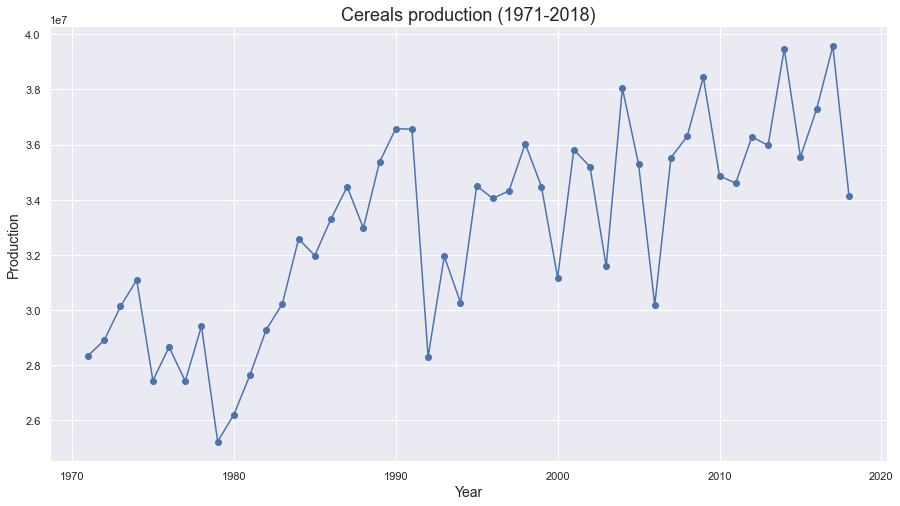

In [52]:
# Plot cereals

plt.figure(figsize=(15,8))
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Production", fontsize= 14)
plt.title("Cereals production (1971-2018)", fontsize= 18)

plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Cereals.Total"], "b-o")
plt.show();


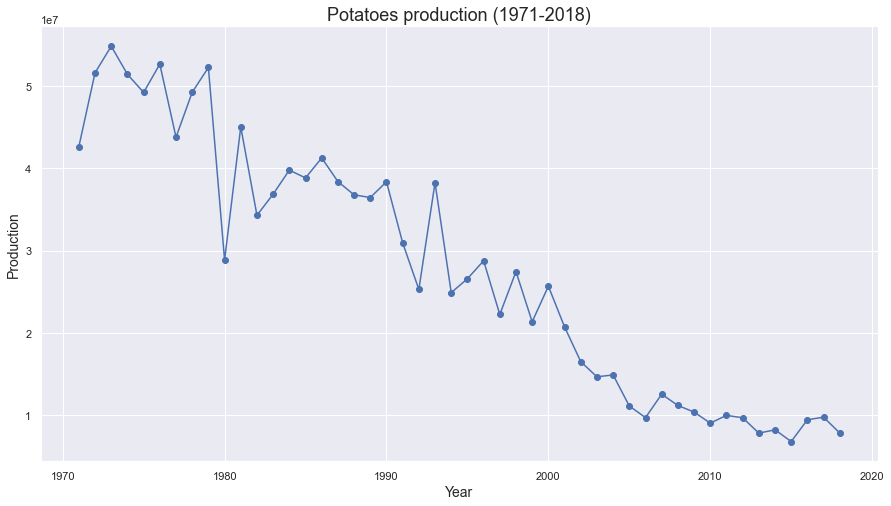

In [53]:
# Plot "Potatoes"

plt.figure(figsize=(15,8))
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Production", fontsize = 14)
plt.title("Potatoes production (1971-2018)", fontsize=18)

plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Potatoes"], "b-o")
plt.show();

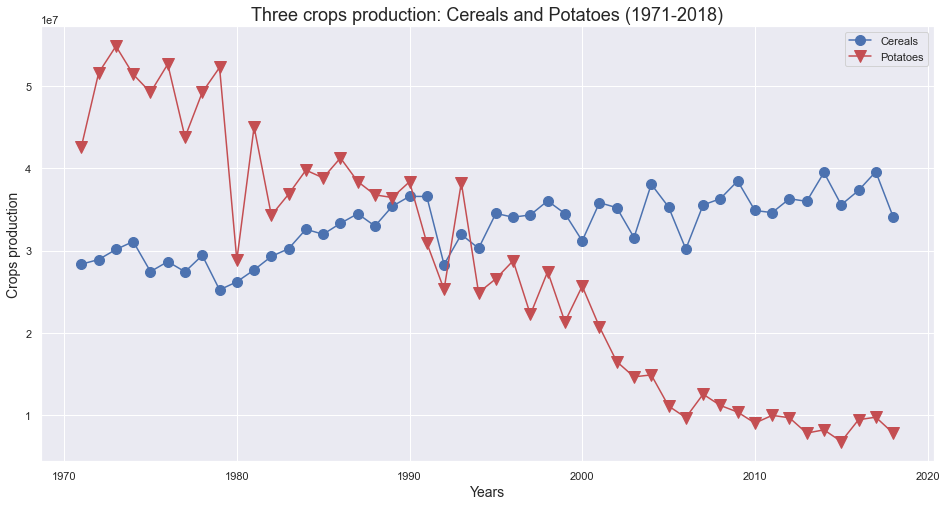

In [55]:
# Base of the plot 
plt.figure(figsize=(16,8))
plt.xlabel("Years", fontsize= 14)
plt.ylabel("Crops production", fontsize= 14)
plt.title("Three crops production: Cereals and Potatoes (1971-2018)", fontsize=18)

# Plot itself
plt.plot(cropsNitrox_df["Year"],cropsNitrox_df["Cereals.Total"], "b-o", markersize=10, label="Cereals")
plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Potatoes"], 'r-v', markersize = 12, label = "Potatoes")
plt.legend()
plt.show();


### 5.4 GHG emission data collection procedure

The Nitrous Oxide (N2O) dataset were gathered from the *databank.worldbank.org*. Those datasets were filtered using the the tools provided by the website itself (using SQL) to include only Poland from the period from 1971 to 2018.

#### 5.2.1 Loading the dataset

In [39]:
# Loading Nitrous Oxide (N2O) dataset
data_nitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1971-nitrous-TRANSPOSED-Poland.csv", index_col=None)

#### 5.2.2 Describing the N20 dataset

In [ ]:
data_nitrox.columns

Index(['Year', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], dtype='object')

In [ ]:
vars_ghg_charact = ([["Variable", "Description", "Type", "Level"],
                     ["Series Name", "Nitrous Oxide", "String", "Nominal"],
                     ["Series Code", "Code of the series", "String", "Nominal"],
                     ["Country Name", "Poland", "String", "Nominal"],
                     ["Country Code", "POL", "String", "Nominal"],
                     ["Year", "From 1971 to 2018", "Integer", "Interval"]])

print(tabulate(vars_ghg_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤════════════════════╤═════════╤══════════╕
│ Variable     │ Description        │ Type    │ Level    │
╞══════════════╪════════════════════╪═════════╪══════════╡
│ Series Name  │ Nitrous Oxide      │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Series Code  │ Code of the series │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Country Name │ Poland             │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Country Code │ POL                │ String  │ Nominal  │
├──────────────┼────────────────────┼─────────┼──────────┤
│ Year         │ From 1971 to 2018  │ Integer │ Interval │
╘══════════════╧════════════════════╧═════════╧══════════╛


In [ ]:
print(data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"].describe())

count       48.00
mean    30,026.39
std      8,996.23
min     20,500.00
25%     23,230.00
50%     24,595.00
75%     38,085.51
max     46,495.35
Name: Nitrous oxide emissions (thousand metric tons of CO2 equivalent), dtype: float64


#### 5.2.3 Preparing **data_nitrox** dataset for plotting

In [ ]:
# Transforming the data to numeric
pd.to_numeric(data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"]);

#### 5.2.4 Plotting **data_nitrox**

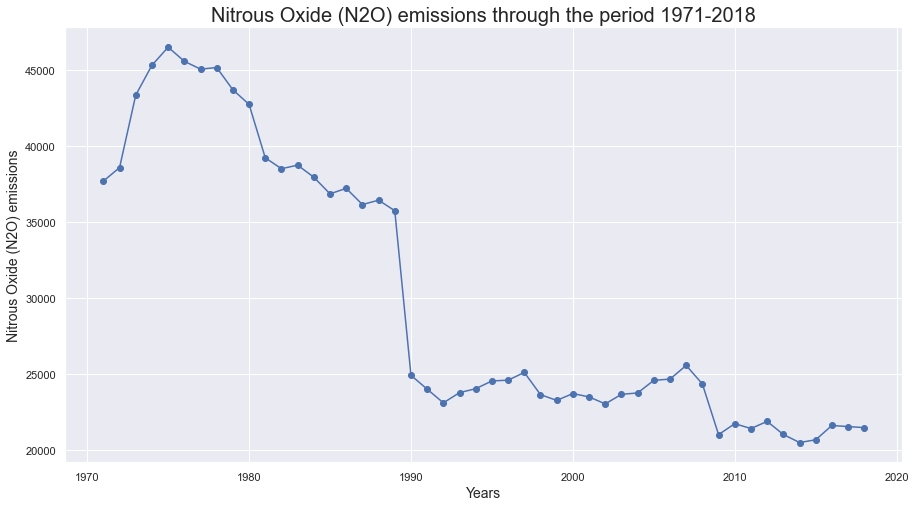

In [ ]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Years", fontsize=14)
plt.ylabel("Nitrous Oxide (N2O) emissions", fontsize=14)
plt.title("Nitrous Oxide (N2O) emissions through the period 1971-2018", fontsize=20)

# Plot
plt.plot(data_nitrox["Year"], data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"], "b-o")
plt.show();

It is observed a huge drop in N2O emissions after 1989, so it was decided to cut the dataset from that date in order to analyze the data after that 1989.

In [60]:
onitrox =  CropsNitrox.copy()
onitrox = onitrox.iloc[19:]
onitrox.head(10)


,Year,Nitrous.oxide.emissions.,Cereals.Total,Roots.and.Tubers,Potatoes
19,1990,"24,920.00",36577197,38345977,38345977
20,1991,"24,010.00",36559688,30938420,30938420
21,1992,"23,110.00",28307266,25278166,25278166
22,1993,"23,780.00",31950781,38237224,38237224
23,1994,"24,040.00",30270087,24890640,24890640
24,1995,"24,550.00",34506752,26577192,26577192
25,1996,"24,600.00",34046935,28761810,28761810
26,1997,"25,110.00",34327440,22241111,22241111
27,1998,"23,650.00",36033151,27444051,27444051
28,1999,"23,270.00",34481217,21351732,21351732


## 6. Data analysis

#### 6.1 Descriptive analysis

A new file was created in RStudio. This file contains the two datasets merged. After, it was created a descriptive analysis of the data.

In [62]:
CropsNitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\CropsNitrox.csv")

In [63]:
CropsNitrox.loc[ : , CropsNitrox.columns != "Year"].describe()

,Nitrous.oxide.emissions.,Cereals.Total,Potatoes
count,48.00,48.00,48.00
mean,"30,026.39","32,980,603.17","27,794,209.40"
std,"8,996.23","3,639,354.81","15,377,540.62"
min,"20,500.00","25,234,198.00","6,824,231.00"
25%,"23,230.00","30,170,408.00","11,184,625.75"
50%,"24,595.00","34,084,246.00","27,010,621.50"
75%,"38,085.51","35,616,846.50","39,051,279.75"
max,"46,495.35","39,568,956.00","54,800,486.00"


It is observed that none of the variables studied: Cereals (x1) and Potatoes (x2) present extreme data. This is also not the case for Nitrous Oxide (N2O) emissions. However, the scatter in the data for Potatoes and Roots and Tubers appears to be considerable in comparison.

In [66]:
CropsNitrox.columns

Index(['Year', 'Nitrous.oxide.emissions.', 'Cereals.Total', 'Potatoes'], dtype='object')

### Histograms

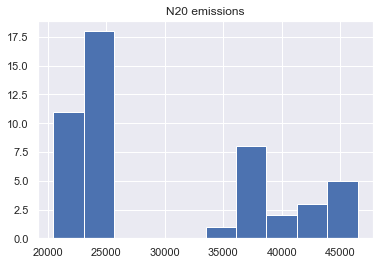

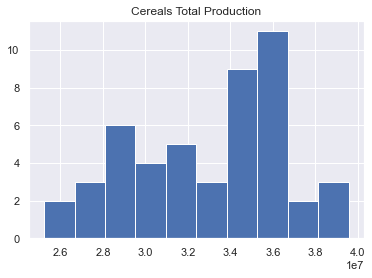

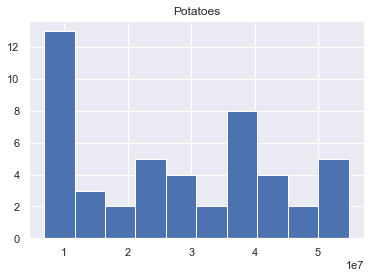

In [64]:
# N20 Histogram
plt.title("N20 emissions")
plt.hist(CropsNitrox["Nitrous.oxide.emissions."])
plt.show();

# Cereals production Histogram
plt.title("Cereals Total Production")
plt.hist(CropsNitrox["Cereals.Total"])
plt.show();

# Potatoes production histogram
plt.title("Potatoes")
plt.hist(CropsNitrox["Potatoes"])
plt.show();

### BoxPlots

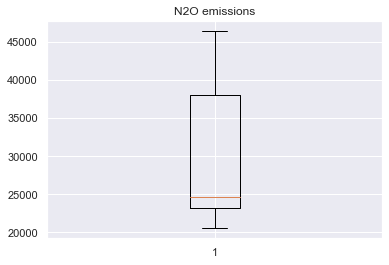

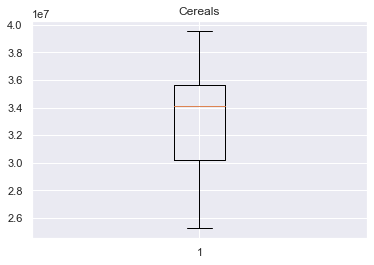

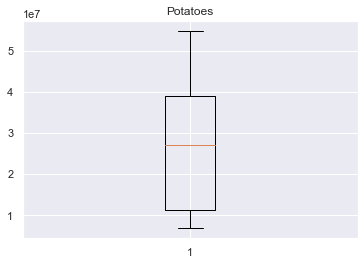

In [65]:
# Nitrous Oxide Emissions Boxplot
plt.title("N2O emissions")
plt.boxplot(CropsNitrox["Nitrous.oxide.emissions."])
plt.show();

# Cereals production boxplot
plt.title("Cereals")
plt.boxplot(CropsNitrox["Cereals.Total"])
plt.show();

# Potatoes production boxplot
plt.title("Potatoes")
plt.boxplot(CropsNitrox["Potatoes"])
plt.show();

#### 6.2 Bivariate analysis

##### 6.2.1 Scatter plot  and Regression: N2O vs Cereals

In [67]:
y = data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"].tolist()
x1 = cropsNitrox_df["Cereals.Total"].tolist()

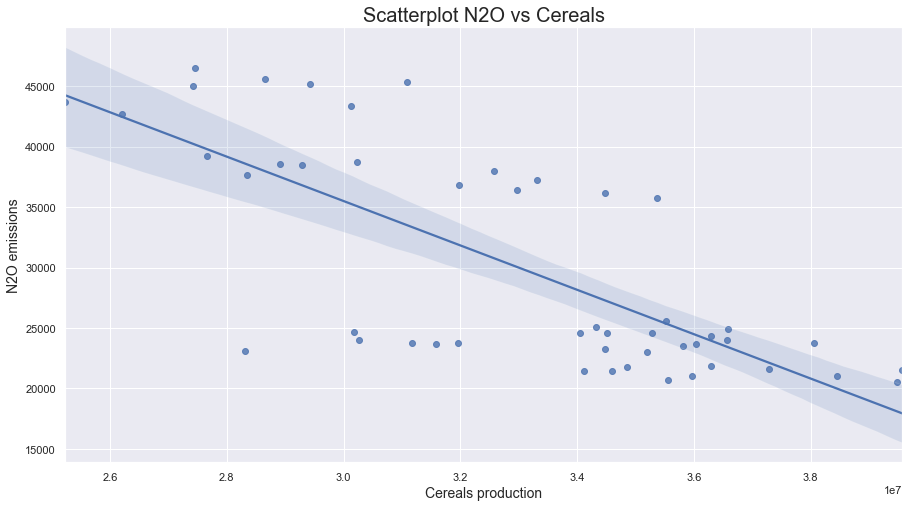

In [68]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Cereals production", fontsize= 14)
plt.ylabel("N2O emissions", fontsize=14)
plt.title("Scatterplot N2O vs Cereals", fontsize=20)

# Scatterplot itself
sns.regplot(x= x1, y= y)
plt.show();

In [ ]:
X_cereals = sm.add_constant(x1)
results_cereals = sm.OLS(y,X_cereals).fit()
results_cereals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     56.57
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           1.51e-09
Time:                        17:38:19   Log-Likelihood:                -485.38
No. Observations:                  48   AIC:                             974.8
Df Residuals:                      46   BIC:                             978.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.057e+04   8097.572     11.185      0.000    7.43e+04    1.07e+05
x1            -0.0018      0.000     -7.521      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        0.590   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.580
Skew:                          -0.245   Prob(JB):                        0.748
Kurtosis:                       2.776   Cond. No.                     3.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Explanation**

* The graph shows two separate groups. The mayority of the observations seems to be spread of the line of regression.
* The data seems to have a negative correlation.
* Due P < 0.05, the variable is significative. 
* Due the low value of R<sup>2</sup>, the model seems to be weak the explain the variability of the data.

##### 6.2.2 Scatter plot and Regression: Nitrous Oxide vs Roots and Tubers

In [ ]:
x2 = cropsNitrox_df["Roots.and.Tubers"].tolist()

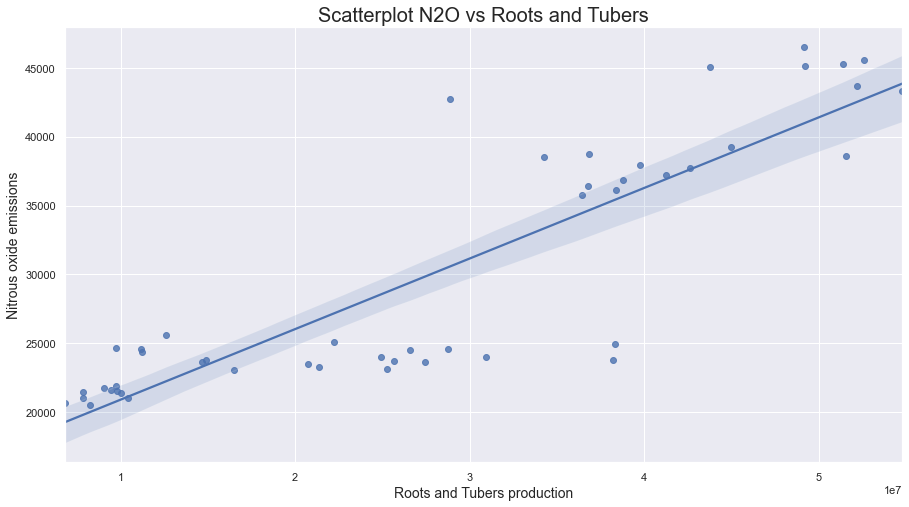

In [ ]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Roots and Tubers production", fontsize=14)
plt.ylabel("Nitrous oxide emissions", fontsize=14)
plt.title("Scatterplot N2O vs Roots and Tubers", fontsize=20)

# Plot itself
sns.regplot(x= x2, y= y)
plt.show();

In [ ]:
X_RootsTubers = sm.add_constant(x2)
results_RootsTubers = sm.OLS(y, X_RootsTubers).fit()
results_RootsTubers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           4.13e-16
Time:                        17:38:21   Log-Likelihood:                -469.77
No. Observations:                  48   AIC:                             943.5
Df Residuals:                      46   BIC:                             947.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.58e+04   1322.186     11.946      0.000    1.31e+04    1.85e+04
x1             0.0005   4.17e-05     12.271      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.151   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.277
Skew:                          -0.379   Prob(JB):                        0.194
Kurtosis:                       4.031   Cond. No.                     6.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Explanation**
* The graph shows two separate groups of data in which, the mayority of the observations seems to be spread from the line of regression.
* This data seems to have a positive correlation.
* Due P < 0.05, the variable is significative. 
* Due the low value of R<sup>2</sup>, the model seems to be weak the explain the variability of the data.

##### 6.2.3 Scatter plot and Regression: Nitrox vs Potatoes

In [ ]:
x3 = cropsNitrox_df["Potatoes"].tolist()

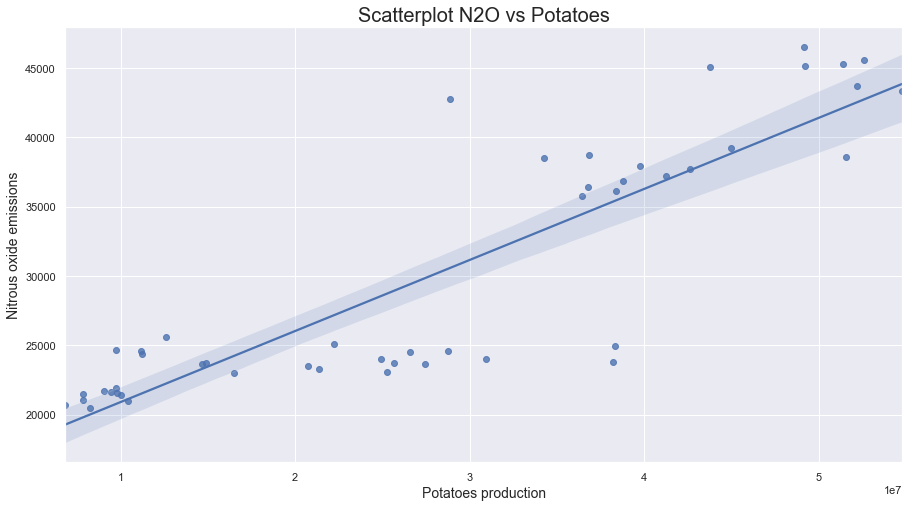

In [ ]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Potatoes production", fontsize=14)
plt.ylabel("Nitrous oxide emissions", fontsize=14)
plt.title("Scatterplot N2O vs Potatoes", fontsize=20)

# Scatterplot itself
sns.regplot(x= x3, y= y)
plt.show();

In [ ]:
X_Potatoes = sm.add_constant(x3)
results_Potatoes = sm.OLS(y, X_Potatoes).fit()
results_Potatoes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           4.13e-16
Time:                        17:38:22   Log-Likelihood:                -469.77
No. Observations:                  48   AIC:                             943.5
Df Residuals:                      46   BIC:                             947.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.58e+04   1322.186     11.946      0.000    1.31e+04    1.85e+04
x1             0.0005   4.17e-05     12.271      0.000       0.000       0.001
==============================================================================
Omnibus:                        4.151   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.277
Skew:                          -0.379   Prob(JB):                        0.194
Kurtosis:                       4.031   Cond. No.                     6.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Explanation**
* The graph shows two separate groups of data in which, the mayority of the observations seems to be spread from the line of regression.
* This data seems to have a positive correlation.
* P < 0.05, so the variable is significative. 
* Due the low value of R<sup>2</sup>, the model seems to be weak the explain the variability of the data.

### 7. Conclusion/Discussion

* It seems that the data, at least with the current variables (Cereals, Roots and Tubers and Potatoes), are not sufficient to explain nitrous oxide emissions. It will be necessary to add more variables to find a model that better explains the problem.

* However, it seems that at least with the variable “Cereals”, they show a positive correlation, however, as mentioned above, given the values of R<sup>2</sup> and adjusted R<sup>2</sup>, the models are weak in explaining the variability.

## References

* Food and Agriculture Organization of the United Nations (FAO). (2018). Crop Production - dataset by agriculture. https://data.world/agriculture/crop-production
* The World Bank. (2022). Nitrous oxide emissions (thousand metric tons of CO2 equivalent) | Data. https://data.worldbank.org/indicator/EN.ATM.NOXE.KT.CE
* Wąs, Adam; Kobus, Paweł; Krupin, Vitaliy; Witajewski-Baltvilks, Jan; Cygler, M. (2020). Asessng Climate Policy Impacts in Poland’s Agriculture -Options Overview- (Issue June). https://climatecake.ios.edu.pl/aktualnosci/news-cake/new-cake-analysis-assessing-climate-policy-impacts-in-polands-agriculture-options-overview/?lang=en